### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df['var3'].value_counts( )[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [10]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.716371	validation_1-auc:0.721224
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.808233	validation_1-auc:0.811497
[2]	validation_0-auc:0.804883	validation_1-auc:0.804536
[3]	validation_0-auc:0.815261	validation_1-auc:0.81637
[4]	validation_0-auc:0.825247	validation_1-auc:0.824507
[5]	validation_0-auc:0.819668	validation_1-auc:0.820074
[6]	validation_0-auc:0.818989	validation_1-auc:0.819519
[7]	validation_0-auc:0.824907	validation_1-auc:0.825344
[8]	validation_0-auc:0.828985	validation_1-auc:0.828536
[9]	validation_0-auc:0.827021	validation_1-auc:0.825688
[10]	validation_0-auc:0.83165	validation_1-auc:0.828585
[11]	validation_0-auc:0.834058	validation_1-auc:0.831318
[12]	validation_0-auc:0.836334	validation_1-auc:0.832347
[13]	validation_0-auc:0.835441	validation_1-auc:0.831432
[14]	validation_0-auc:0.834861	validation_1-auc:0.830882


[47]	validation_0-auc:0.862967	validation_1-auc:0.842593
[48]	validation_0-auc:0.863551	validation_1-auc:0.84261
[49]	validation_0-auc:0.864042	validation_1-auc:0.842599
[50]	validation_0-auc:0.864366	validation_1-auc:0.842434
[51]	validation_0-auc:0.865353	validation_1-auc:0.843195
[52]	validation_0-auc:0.866013	validation_1-auc:0.843838
[53]	validation_0-auc:0.866414	validation_1-auc:0.84388
[54]	validation_0-auc:0.86717	validation_1-auc:0.844016
[55]	validation_0-auc:0.867641	validation_1-auc:0.8437
[56]	validation_0-auc:0.868209	validation_1-auc:0.844056
[57]	validation_0-auc:0.868522	validation_1-auc:0.844175
[58]	validation_0-auc:0.868781	validation_1-auc:0.844342
[59]	validation_0-auc:0.869079	validation_1-auc:0.844691
[60]	validation_0-auc:0.869423	validation_1-auc:0.844647
[61]	validation_0-auc:0.869812	validation_1-auc:0.844665
[62]	validation_0-auc:0.870011	validation_1-auc:0.844629
[63]	validation_0-auc:0.870417	validation_1-auc:0.844743
[64]	validation_0-auc:0.870882	valid

[1]	validation_0-auc:0.809291	validation_1-auc:0.810292
[2]	validation_0-auc:0.801509	validation_1-auc:0.805559
[3]	validation_0-auc:0.811599	validation_1-auc:0.814615
[4]	validation_0-auc:0.823122	validation_1-auc:0.824642
[5]	validation_0-auc:0.820774	validation_1-auc:0.820123
[6]	validation_0-auc:0.819431	validation_1-auc:0.819198
[7]	validation_0-auc:0.82599	validation_1-auc:0.825043
[8]	validation_0-auc:0.830975	validation_1-auc:0.829029
[9]	validation_0-auc:0.829664	validation_1-auc:0.827526
[10]	validation_0-auc:0.831341	validation_1-auc:0.829234
[11]	validation_0-auc:0.833655	validation_1-auc:0.83098
[12]	validation_0-auc:0.836167	validation_1-auc:0.832389
[13]	validation_0-auc:0.835919	validation_1-auc:0.830942
[14]	validation_0-auc:0.835294	validation_1-auc:0.831207
[15]	validation_0-auc:0.838006	validation_1-auc:0.832957
[16]	validation_0-auc:0.840265	validation_1-auc:0.834066
[17]	validation_0-auc:0.843274	validation_1-auc:0.837085
[18]	validation_0-auc:0.844687	validation_

[49]	validation_0-auc:0.865152	validation_1-auc:0.840495
[50]	validation_0-auc:0.865554	validation_1-auc:0.840383
[51]	validation_0-auc:0.866651	validation_1-auc:0.841277
[52]	validation_0-auc:0.867289	validation_1-auc:0.841679
[53]	validation_0-auc:0.86781	validation_1-auc:0.842134
[54]	validation_0-auc:0.868175	validation_1-auc:0.842503
[55]	validation_0-auc:0.868746	validation_1-auc:0.842126
[56]	validation_0-auc:0.869264	validation_1-auc:0.842363
[57]	validation_0-auc:0.869795	validation_1-auc:0.842344
[58]	validation_0-auc:0.870406	validation_1-auc:0.842145
[59]	validation_0-auc:0.870529	validation_1-auc:0.842306
[60]	validation_0-auc:0.870793	validation_1-auc:0.842345
[61]	validation_0-auc:0.871081	validation_1-auc:0.842398
[62]	validation_0-auc:0.871391	validation_1-auc:0.84243
[63]	validation_0-auc:0.871823	validation_1-auc:0.842369
[64]	validation_0-auc:0.872147	validation_1-auc:0.842177
[65]	validation_0-auc:0.872387	validation_1-auc:0.842151
[66]	validation_0-auc:0.872716	va

[91]	validation_0-auc:0.873633	validation_1-auc:0.841873
[92]	validation_0-auc:0.873647	validation_1-auc:0.841868
Stopping. Best iteration:
[62]	validation_0-auc:0.867211	validation_1-auc:0.842672

[0]	validation_0-auc:0.720599	validation_1-auc:0.727176
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.813587	validation_1-auc:0.811508
[2]	validation_0-auc:0.809088	validation_1-auc:0.810017
[3]	validation_0-auc:0.816841	validation_1-auc:0.817096
[4]	validation_0-auc:0.825512	validation_1-auc:0.82418
[5]	validation_0-auc:0.819472	validation_1-auc:0.819553
[6]	validation_0-auc:0.818305	validation_1-auc:0.817745
[7]	validation_0-auc:0.824445	validation_1-auc:0.821165
[8]	validation_0-auc:0.829549	validation_1-auc:0.824451
[9]	validation_0-auc:0.827249	validation_1-auc:0.822791
[10]	validation_0-auc:0.831955	validation_1-auc:0.826125
[11]	validation_0-auc:0.83463

[44]	validation_0-auc:0.859675	validation_1-auc:0.843153
[45]	validation_0-auc:0.859877	validation_1-auc:0.842876
[46]	validation_0-auc:0.860834	validation_1-auc:0.843148
[47]	validation_0-auc:0.86139	validation_1-auc:0.84365
[48]	validation_0-auc:0.861896	validation_1-auc:0.843055
[49]	validation_0-auc:0.86227	validation_1-auc:0.843147
[50]	validation_0-auc:0.862465	validation_1-auc:0.843175
[51]	validation_0-auc:0.863455	validation_1-auc:0.843601
[52]	validation_0-auc:0.864045	validation_1-auc:0.844561
[53]	validation_0-auc:0.864373	validation_1-auc:0.844592
[54]	validation_0-auc:0.865132	validation_1-auc:0.844711
[55]	validation_0-auc:0.865639	validation_1-auc:0.844622
[56]	validation_0-auc:0.866214	validation_1-auc:0.844794
[57]	validation_0-auc:0.866654	validation_1-auc:0.845023
[58]	validation_0-auc:0.866913	validation_1-auc:0.844949
[59]	validation_0-auc:0.867022	validation_1-auc:0.845055
[60]	validation_0-auc:0.867324	validation_1-auc:0.845122
[61]	validation_0-auc:0.867565	val

[0]	validation_0-auc:0.735027	validation_1-auc:0.735335
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81492	validation_1-auc:0.813277
[2]	validation_0-auc:0.810019	validation_1-auc:0.807851
[3]	validation_0-auc:0.822639	validation_1-auc:0.822826
[4]	validation_0-auc:0.830942	validation_1-auc:0.828226
[5]	validation_0-auc:0.826201	validation_1-auc:0.824934
[6]	validation_0-auc:0.822353	validation_1-auc:0.822025
[7]	validation_0-auc:0.827969	validation_1-auc:0.826601
[8]	validation_0-auc:0.831812	validation_1-auc:0.829191
[9]	validation_0-auc:0.831194	validation_1-auc:0.830193
[10]	validation_0-auc:0.834307	validation_1-auc:0.830952
[11]	validation_0-auc:0.837904	validation_1-auc:0.833269
[12]	validation_0-auc:0.839525	validation_1-auc:0.833868
[13]	validation_0-auc:0.839272	validation_1-auc:0.833541
[14]	validation_0-auc:0.837883	validation_1-auc:0.832479

[44]	validation_0-auc:0.883866	validation_1-auc:0.838308
[45]	validation_0-auc:0.88396	validation_1-auc:0.837827
[46]	validation_0-auc:0.885263	validation_1-auc:0.838541
[47]	validation_0-auc:0.886254	validation_1-auc:0.839524
[48]	validation_0-auc:0.887196	validation_1-auc:0.839156
[49]	validation_0-auc:0.887871	validation_1-auc:0.839015
[50]	validation_0-auc:0.888027	validation_1-auc:0.838628
[51]	validation_0-auc:0.888877	validation_1-auc:0.838931
[52]	validation_0-auc:0.889471	validation_1-auc:0.839587
[53]	validation_0-auc:0.889866	validation_1-auc:0.839802
[54]	validation_0-auc:0.890597	validation_1-auc:0.839836
[55]	validation_0-auc:0.891061	validation_1-auc:0.83964
[56]	validation_0-auc:0.891719	validation_1-auc:0.840061
[57]	validation_0-auc:0.892214	validation_1-auc:0.840121
[58]	validation_0-auc:0.892491	validation_1-auc:0.839979
[59]	validation_0-auc:0.892534	validation_1-auc:0.839805
[60]	validation_0-auc:0.893058	validation_1-auc:0.840159
[61]	validation_0-auc:0.893279	va

[20]	validation_0-auc:0.861065	validation_1-auc:0.837455
[21]	validation_0-auc:0.861623	validation_1-auc:0.836928
[22]	validation_0-auc:0.860825	validation_1-auc:0.83631
[23]	validation_0-auc:0.862987	validation_1-auc:0.836815
[24]	validation_0-auc:0.863947	validation_1-auc:0.83794
[25]	validation_0-auc:0.863592	validation_1-auc:0.837839
[26]	validation_0-auc:0.864485	validation_1-auc:0.837299
[27]	validation_0-auc:0.866097	validation_1-auc:0.837962
[28]	validation_0-auc:0.868118	validation_1-auc:0.837987
[29]	validation_0-auc:0.868262	validation_1-auc:0.838402
[30]	validation_0-auc:0.869825	validation_1-auc:0.839272
[31]	validation_0-auc:0.871116	validation_1-auc:0.839298
[32]	validation_0-auc:0.871551	validation_1-auc:0.838975
[33]	validation_0-auc:0.872337	validation_1-auc:0.838641
[34]	validation_0-auc:0.873346	validation_1-auc:0.838029
[35]	validation_0-auc:0.876211	validation_1-auc:0.837885
[36]	validation_0-auc:0.878087	validation_1-auc:0.837843
[37]	validation_0-auc:0.87863	val

[74]	validation_0-auc:0.896502	validation_1-auc:0.843407
[75]	validation_0-auc:0.896762	validation_1-auc:0.843536
[76]	validation_0-auc:0.896822	validation_1-auc:0.843657
[77]	validation_0-auc:0.896957	validation_1-auc:0.843717
[78]	validation_0-auc:0.897215	validation_1-auc:0.843671
[79]	validation_0-auc:0.897411	validation_1-auc:0.84374
[80]	validation_0-auc:0.897455	validation_1-auc:0.84355
[81]	validation_0-auc:0.897449	validation_1-auc:0.843488
[82]	validation_0-auc:0.897494	validation_1-auc:0.843507
[83]	validation_0-auc:0.898414	validation_1-auc:0.844046
[84]	validation_0-auc:0.898664	validation_1-auc:0.843991
[85]	validation_0-auc:0.898771	validation_1-auc:0.844074
[86]	validation_0-auc:0.898867	validation_1-auc:0.844106
[87]	validation_0-auc:0.899498	validation_1-auc:0.844263
[88]	validation_0-auc:0.899696	validation_1-auc:0.844176
[89]	validation_0-auc:0.899781	validation_1-auc:0.844125
[90]	validation_0-auc:0.900419	validation_1-auc:0.844283
[91]	validation_0-auc:0.90043	val

[17]	validation_0-auc:0.85466	validation_1-auc:0.83771
[18]	validation_0-auc:0.855903	validation_1-auc:0.838248
[19]	validation_0-auc:0.855356	validation_1-auc:0.838063
[20]	validation_0-auc:0.857937	validation_1-auc:0.839188
[21]	validation_0-auc:0.858802	validation_1-auc:0.838105
[22]	validation_0-auc:0.858538	validation_1-auc:0.836951
[23]	validation_0-auc:0.860263	validation_1-auc:0.838669
[24]	validation_0-auc:0.86152	validation_1-auc:0.839808
[25]	validation_0-auc:0.861871	validation_1-auc:0.838553
[26]	validation_0-auc:0.862476	validation_1-auc:0.837949
[27]	validation_0-auc:0.864001	validation_1-auc:0.839431
[28]	validation_0-auc:0.865204	validation_1-auc:0.839756
[29]	validation_0-auc:0.865209	validation_1-auc:0.838697
[30]	validation_0-auc:0.86648	validation_1-auc:0.839908
[31]	validation_0-auc:0.867883	validation_1-auc:0.840735
[32]	validation_0-auc:0.868741	validation_1-auc:0.840484
[33]	validation_0-auc:0.869669	validation_1-auc:0.840787
[34]	validation_0-auc:0.869892	vali

[59]	validation_0-auc:0.885952	validation_1-auc:0.84472
[60]	validation_0-auc:0.886392	validation_1-auc:0.844757
[61]	validation_0-auc:0.886671	validation_1-auc:0.844602
[62]	validation_0-auc:0.886879	validation_1-auc:0.844753
[63]	validation_0-auc:0.887226	validation_1-auc:0.844586
[64]	validation_0-auc:0.887641	validation_1-auc:0.844526
[65]	validation_0-auc:0.887963	validation_1-auc:0.844478
[66]	validation_0-auc:0.888125	validation_1-auc:0.844307
[67]	validation_0-auc:0.88838	validation_1-auc:0.844354
[68]	validation_0-auc:0.888613	validation_1-auc:0.844493
[69]	validation_0-auc:0.888692	validation_1-auc:0.844463
[70]	validation_0-auc:0.888954	validation_1-auc:0.844633
[71]	validation_0-auc:0.889285	validation_1-auc:0.844523
[72]	validation_0-auc:0.889456	validation_1-auc:0.844447
[73]	validation_0-auc:0.889553	validation_1-auc:0.844276
[74]	validation_0-auc:0.889602	validation_1-auc:0.844382
[75]	validation_0-auc:0.889765	validation_1-auc:0.844364
[76]	validation_0-auc:0.889802	va

[17]	validation_0-auc:0.854478	validation_1-auc:0.836062
[18]	validation_0-auc:0.856799	validation_1-auc:0.838367
[19]	validation_0-auc:0.855686	validation_1-auc:0.837554
[20]	validation_0-auc:0.856948	validation_1-auc:0.837934
[21]	validation_0-auc:0.857847	validation_1-auc:0.837916
[22]	validation_0-auc:0.857669	validation_1-auc:0.837855
[23]	validation_0-auc:0.859283	validation_1-auc:0.838945
[24]	validation_0-auc:0.86041	validation_1-auc:0.839746
[25]	validation_0-auc:0.860838	validation_1-auc:0.839309
[26]	validation_0-auc:0.861041	validation_1-auc:0.838778
[27]	validation_0-auc:0.862158	validation_1-auc:0.839817
[28]	validation_0-auc:0.863805	validation_1-auc:0.840639
[29]	validation_0-auc:0.864097	validation_1-auc:0.840569
[30]	validation_0-auc:0.866199	validation_1-auc:0.841654
[31]	validation_0-auc:0.867624	validation_1-auc:0.842761
[32]	validation_0-auc:0.867772	validation_1-auc:0.841998
[33]	validation_0-auc:0.86771	validation_1-auc:0.842154
[34]	validation_0-auc:0.868043	va

[80]	validation_0-auc:0.893242	validation_1-auc:0.842128
[81]	validation_0-auc:0.893335	validation_1-auc:0.84216
[82]	validation_0-auc:0.893393	validation_1-auc:0.84219
[83]	validation_0-auc:0.893833	validation_1-auc:0.842336
[84]	validation_0-auc:0.894021	validation_1-auc:0.842299
[85]	validation_0-auc:0.89418	validation_1-auc:0.842333
[86]	validation_0-auc:0.894252	validation_1-auc:0.842303
[87]	validation_0-auc:0.894739	validation_1-auc:0.842302
[88]	validation_0-auc:0.894996	validation_1-auc:0.842276
[89]	validation_0-auc:0.895222	validation_1-auc:0.842239
[90]	validation_0-auc:0.895531	validation_1-auc:0.842325
[91]	validation_0-auc:0.896119	validation_1-auc:0.84252
[92]	validation_0-auc:0.896216	validation_1-auc:0.842463
[93]	validation_0-auc:0.896321	validation_1-auc:0.842536
[94]	validation_0-auc:0.896373	validation_1-auc:0.842526
[95]	validation_0-auc:0.896786	validation_1-auc:0.842292
[96]	validation_0-auc:0.897123	validation_1-auc:0.842485
[97]	validation_0-auc:0.89727	valid

[46]	validation_0-auc:0.8648	validation_1-auc:0.841669
[47]	validation_0-auc:0.865247	validation_1-auc:0.841793
[48]	validation_0-auc:0.865712	validation_1-auc:0.842127
[49]	validation_0-auc:0.86601	validation_1-auc:0.841942
[50]	validation_0-auc:0.866654	validation_1-auc:0.841979
[51]	validation_0-auc:0.867175	validation_1-auc:0.842368
[52]	validation_0-auc:0.867716	validation_1-auc:0.84232
[53]	validation_0-auc:0.86815	validation_1-auc:0.842158
[54]	validation_0-auc:0.868542	validation_1-auc:0.842209
[55]	validation_0-auc:0.868815	validation_1-auc:0.84224
[56]	validation_0-auc:0.869038	validation_1-auc:0.842059
[57]	validation_0-auc:0.869329	validation_1-auc:0.842016
[58]	validation_0-auc:0.869477	validation_1-auc:0.841913
[59]	validation_0-auc:0.869677	validation_1-auc:0.842133
[60]	validation_0-auc:0.869763	validation_1-auc:0.841683
[61]	validation_0-auc:0.870157	validation_1-auc:0.841694
[62]	validation_0-auc:0.87072	validation_1-auc:0.841797
[63]	validation_0-auc:0.871404	validat

[21]	validation_0-auc:0.848269	validation_1-auc:0.838609
[22]	validation_0-auc:0.84854	validation_1-auc:0.838861
[23]	validation_0-auc:0.849219	validation_1-auc:0.839214
[24]	validation_0-auc:0.849667	validation_1-auc:0.839421
[25]	validation_0-auc:0.851032	validation_1-auc:0.839631
[26]	validation_0-auc:0.851507	validation_1-auc:0.839443
[27]	validation_0-auc:0.85173	validation_1-auc:0.840068
[28]	validation_0-auc:0.852347	validation_1-auc:0.840321
[29]	validation_0-auc:0.852853	validation_1-auc:0.840549
[30]	validation_0-auc:0.853382	validation_1-auc:0.840983
[31]	validation_0-auc:0.85414	validation_1-auc:0.841168
[32]	validation_0-auc:0.854864	validation_1-auc:0.840985
[33]	validation_0-auc:0.856042	validation_1-auc:0.840964
[34]	validation_0-auc:0.856663	validation_1-auc:0.840887
[35]	validation_0-auc:0.857275	validation_1-auc:0.840755
[36]	validation_0-auc:0.857992	validation_1-auc:0.840891
[37]	validation_0-auc:0.858724	validation_1-auc:0.841442
[38]	validation_0-auc:0.859673	val

[67]	validation_0-auc:0.874094	validation_1-auc:0.841995
[68]	validation_0-auc:0.874293	validation_1-auc:0.842076
[69]	validation_0-auc:0.874574	validation_1-auc:0.842319
[70]	validation_0-auc:0.874776	validation_1-auc:0.842496
[71]	validation_0-auc:0.875001	validation_1-auc:0.842369
[72]	validation_0-auc:0.875482	validation_1-auc:0.842579
[73]	validation_0-auc:0.875802	validation_1-auc:0.842413
[74]	validation_0-auc:0.875986	validation_1-auc:0.842394
[75]	validation_0-auc:0.876425	validation_1-auc:0.842592
[76]	validation_0-auc:0.876479	validation_1-auc:0.842572
[77]	validation_0-auc:0.876697	validation_1-auc:0.842393
[78]	validation_0-auc:0.87704	validation_1-auc:0.842439
[79]	validation_0-auc:0.877125	validation_1-auc:0.842482
[80]	validation_0-auc:0.877379	validation_1-auc:0.842524
[81]	validation_0-auc:0.877719	validation_1-auc:0.842536
[82]	validation_0-auc:0.87812	validation_1-auc:0.842526
[83]	validation_0-auc:0.878209	validation_1-auc:0.842568
[84]	validation_0-auc:0.878395	va

[35]	validation_0-auc:0.85759	validation_1-auc:0.842726
[36]	validation_0-auc:0.858	validation_1-auc:0.842454
[37]	validation_0-auc:0.858333	validation_1-auc:0.841799
[38]	validation_0-auc:0.858777	validation_1-auc:0.841887
[39]	validation_0-auc:0.85928	validation_1-auc:0.84174
[40]	validation_0-auc:0.859781	validation_1-auc:0.841652
[41]	validation_0-auc:0.860396	validation_1-auc:0.842248
[42]	validation_0-auc:0.860868	validation_1-auc:0.842219
[43]	validation_0-auc:0.861316	validation_1-auc:0.842178
[44]	validation_0-auc:0.86181	validation_1-auc:0.842234
[45]	validation_0-auc:0.86229	validation_1-auc:0.842692
[46]	validation_0-auc:0.862674	validation_1-auc:0.84277
[47]	validation_0-auc:0.862953	validation_1-auc:0.842554
[48]	validation_0-auc:0.863416	validation_1-auc:0.842482
[49]	validation_0-auc:0.863877	validation_1-auc:0.842551
[50]	validation_0-auc:0.864252	validation_1-auc:0.842979
[51]	validation_0-auc:0.86471	validation_1-auc:0.842786
[52]	validation_0-auc:0.865109	validation

[9]	validation_0-auc:0.838139	validation_1-auc:0.830813
[10]	validation_0-auc:0.838411	validation_1-auc:0.830358
[11]	validation_0-auc:0.839455	validation_1-auc:0.831975
[12]	validation_0-auc:0.840107	validation_1-auc:0.832663
[13]	validation_0-auc:0.841676	validation_1-auc:0.833822
[14]	validation_0-auc:0.842589	validation_1-auc:0.834433
[15]	validation_0-auc:0.843414	validation_1-auc:0.834282
[16]	validation_0-auc:0.84456	validation_1-auc:0.834773
[17]	validation_0-auc:0.845351	validation_1-auc:0.834892
[18]	validation_0-auc:0.845892	validation_1-auc:0.835711
[19]	validation_0-auc:0.845996	validation_1-auc:0.837348
[20]	validation_0-auc:0.847836	validation_1-auc:0.837871
[21]	validation_0-auc:0.847642	validation_1-auc:0.838138
[22]	validation_0-auc:0.84825	validation_1-auc:0.838559
[23]	validation_0-auc:0.848683	validation_1-auc:0.838986
[24]	validation_0-auc:0.848893	validation_1-auc:0.838704
[25]	validation_0-auc:0.850001	validation_1-auc:0.839012
[26]	validation_0-auc:0.850519	val

[72]	validation_0-auc:0.872146	validation_1-auc:0.843327
[73]	validation_0-auc:0.87233	validation_1-auc:0.843429
[74]	validation_0-auc:0.872579	validation_1-auc:0.84338
[75]	validation_0-auc:0.872866	validation_1-auc:0.843064
[76]	validation_0-auc:0.872944	validation_1-auc:0.843145
[77]	validation_0-auc:0.873056	validation_1-auc:0.843229
[78]	validation_0-auc:0.87328	validation_1-auc:0.843186
[79]	validation_0-auc:0.873387	validation_1-auc:0.843194
[80]	validation_0-auc:0.87354	validation_1-auc:0.842953
[81]	validation_0-auc:0.873669	validation_1-auc:0.842926
[82]	validation_0-auc:0.873865	validation_1-auc:0.842949
[83]	validation_0-auc:0.873971	validation_1-auc:0.842868
[84]	validation_0-auc:0.874092	validation_1-auc:0.842976
[85]	validation_0-auc:0.874239	validation_1-auc:0.84318
[86]	validation_0-auc:0.874292	validation_1-auc:0.843079
[87]	validation_0-auc:0.874648	validation_1-auc:0.843095
[88]	validation_0-auc:0.874955	validation_1-auc:0.842935
[89]	validation_0-auc:0.875037	valid

[38]	validation_0-auc:0.881984	validation_1-auc:0.842147
[39]	validation_0-auc:0.882994	validation_1-auc:0.841905
[40]	validation_0-auc:0.88375	validation_1-auc:0.842009
[41]	validation_0-auc:0.884477	validation_1-auc:0.842543
[42]	validation_0-auc:0.885354	validation_1-auc:0.842277
[43]	validation_0-auc:0.886504	validation_1-auc:0.841963
[44]	validation_0-auc:0.887218	validation_1-auc:0.841897
[45]	validation_0-auc:0.888024	validation_1-auc:0.842132
[46]	validation_0-auc:0.88871	validation_1-auc:0.842191
[47]	validation_0-auc:0.889249	validation_1-auc:0.841935
[48]	validation_0-auc:0.889782	validation_1-auc:0.841548
[49]	validation_0-auc:0.890499	validation_1-auc:0.841694
[50]	validation_0-auc:0.891322	validation_1-auc:0.841738
[51]	validation_0-auc:0.891809	validation_1-auc:0.841493
[52]	validation_0-auc:0.89246	validation_1-auc:0.84135
[53]	validation_0-auc:0.892825	validation_1-auc:0.841669
[54]	validation_0-auc:0.89329	validation_1-auc:0.841769
[55]	validation_0-auc:0.893402	valid

[57]	validation_0-auc:0.893694	validation_1-auc:0.843455
[58]	validation_0-auc:0.894555	validation_1-auc:0.843582
[59]	validation_0-auc:0.894706	validation_1-auc:0.843591
[60]	validation_0-auc:0.894899	validation_1-auc:0.843354
[61]	validation_0-auc:0.895218	validation_1-auc:0.84345
Stopping. Best iteration:
[31]	validation_0-auc:0.875223	validation_1-auc:0.84504

[0]	validation_0-auc:0.824247	validation_1-auc:0.817042
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828268	validation_1-auc:0.820775
[2]	validation_0-auc:0.83099	validation_1-auc:0.821871
[3]	validation_0-auc:0.835811	validation_1-auc:0.824768
[4]	validation_0-auc:0.836693	validation_1-auc:0.829421
[5]	validation_0-auc:0.843953	validation_1-auc:0.831358
[6]	validation_0-auc:0.844795	validation_1-auc:0.831664
[7]	validation_0-auc:0.846039	validation_1-auc:0.831437
[8]	validation_0-auc:0.84671	

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822797	validation_1-auc:0.817858
[2]	validation_0-auc:0.830112	validation_1-auc:0.822657
[3]	validation_0-auc:0.836008	validation_1-auc:0.82756
[4]	validation_0-auc:0.837619	validation_1-auc:0.828466
[5]	validation_0-auc:0.839996	validation_1-auc:0.82965
[6]	validation_0-auc:0.842981	validation_1-auc:0.830086
[7]	validation_0-auc:0.84369	validation_1-auc:0.831006
[8]	validation_0-auc:0.845052	validation_1-auc:0.831272
[9]	validation_0-auc:0.847985	validation_1-auc:0.834577
[10]	validation_0-auc:0.849627	validation_1-auc:0.834416
[11]	validation_0-auc:0.849852	validation_1-auc:0.834503
[12]	validation_0-auc:0.850294	validation_1-auc:0.834119
[13]	validation_0-auc:0.852049	validation_1-auc:0.836065
[14]	validation_0-auc:0.853922	validation_1-auc:0.836222
[15]	validation_0-auc:0.855645	validation_1-auc:0.837817
[16]	validation_0-auc:0.857736	validation_1-auc:0.838048
[17]	validation_0-auc:0.859355	valid

[9]	validation_0-auc:0.846892	validation_1-auc:0.831069
[10]	validation_0-auc:0.848336	validation_1-auc:0.832402
[11]	validation_0-auc:0.85054	validation_1-auc:0.834388
[12]	validation_0-auc:0.851094	validation_1-auc:0.83519
[13]	validation_0-auc:0.853134	validation_1-auc:0.837028
[14]	validation_0-auc:0.854288	validation_1-auc:0.837004
[15]	validation_0-auc:0.855254	validation_1-auc:0.838322
[16]	validation_0-auc:0.856437	validation_1-auc:0.838067
[17]	validation_0-auc:0.857929	validation_1-auc:0.838312
[18]	validation_0-auc:0.859632	validation_1-auc:0.838508
[19]	validation_0-auc:0.860563	validation_1-auc:0.839477
[20]	validation_0-auc:0.862077	validation_1-auc:0.840735
[21]	validation_0-auc:0.862593	validation_1-auc:0.841008
[22]	validation_0-auc:0.86327	validation_1-auc:0.84181
[23]	validation_0-auc:0.864434	validation_1-auc:0.842597
[24]	validation_0-auc:0.865038	validation_1-auc:0.842642
[25]	validation_0-auc:0.86574	validation_1-auc:0.843322
[26]	validation_0-auc:0.86633	validat

[21]	validation_0-auc:0.865776	validation_1-auc:0.838794
[22]	validation_0-auc:0.86524	validation_1-auc:0.838435
[23]	validation_0-auc:0.867317	validation_1-auc:0.839363
[24]	validation_0-auc:0.868569	validation_1-auc:0.840288
[25]	validation_0-auc:0.869447	validation_1-auc:0.840665
[26]	validation_0-auc:0.86984	validation_1-auc:0.84061
[27]	validation_0-auc:0.872001	validation_1-auc:0.84066
[28]	validation_0-auc:0.873911	validation_1-auc:0.840676
[29]	validation_0-auc:0.874193	validation_1-auc:0.841444
[30]	validation_0-auc:0.875648	validation_1-auc:0.842116
[31]	validation_0-auc:0.87691	validation_1-auc:0.842438
[32]	validation_0-auc:0.877819	validation_1-auc:0.841824
[33]	validation_0-auc:0.878313	validation_1-auc:0.841681
[34]	validation_0-auc:0.878535	validation_1-auc:0.841624
[35]	validation_0-auc:0.881047	validation_1-auc:0.842103
[36]	validation_0-auc:0.883147	validation_1-auc:0.842436
[37]	validation_0-auc:0.883825	validation_1-auc:0.842027
[38]	validation_0-auc:0.884627	valid

In [11]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.817284	validation_1-auc:0.811534
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.820302	validation_1-auc:0.812178
[2]	validation_0-auc:0.823363	validation_1-auc:0.816027
[3]	validation_0-auc:0.825007	validation_1-auc:0.81705
[4]	validation_0-auc:0.825243	validation_1-auc:0.817264
[5]	validation_0-auc:0.827563	validation_1-auc:0.819988
[6]	validation_0-auc:0.827812	validation_1-auc:0.819542
[7]	validation_0-auc:0.827855	validation_1-auc:0.819216
[8]	validation_0-auc:0.829221	validation_1-auc:0.819799
[9]	validation_0-auc:0.829078	validation_1-auc:0.818898
[10]	validation_0-auc:0.830731	validation_1-auc:0.820967
[11]	validation_0-auc:0.828293	validation_1-auc:0.819437
[12]	validation_0-auc:0.829608	validation_1-auc:0.821204
[13]	validation_0-auc:0.830487	validation_1-auc:0.821121
[14]	validation_0-auc:0.834894	validation_1-auc:0.82706

[141]	validation_0-auc:0.85609	validation_1-auc:0.840527
[142]	validation_0-auc:0.856058	validation_1-auc:0.840824
[143]	validation_0-auc:0.856179	validation_1-auc:0.840714
[144]	validation_0-auc:0.856461	validation_1-auc:0.840902
[145]	validation_0-auc:0.856596	validation_1-auc:0.840922
[146]	validation_0-auc:0.85682	validation_1-auc:0.840999
[147]	validation_0-auc:0.856856	validation_1-auc:0.841113
[148]	validation_0-auc:0.856846	validation_1-auc:0.84122
[149]	validation_0-auc:0.856846	validation_1-auc:0.841151
[150]	validation_0-auc:0.856784	validation_1-auc:0.841142
[151]	validation_0-auc:0.856753	validation_1-auc:0.841307
[152]	validation_0-auc:0.856646	validation_1-auc:0.841443
[153]	validation_0-auc:0.856637	validation_1-auc:0.841588
[154]	validation_0-auc:0.856957	validation_1-auc:0.841629
[155]	validation_0-auc:0.857008	validation_1-auc:0.841672
[156]	validation_0-auc:0.857301	validation_1-auc:0.841631
[157]	validation_0-auc:0.857543	validation_1-auc:0.841666
[158]	validation_

[283]	validation_0-auc:0.872776	validation_1-auc:0.843025
[284]	validation_0-auc:0.872829	validation_1-auc:0.843029
[285]	validation_0-auc:0.872917	validation_1-auc:0.842988
[286]	validation_0-auc:0.87303	validation_1-auc:0.842969
[287]	validation_0-auc:0.873159	validation_1-auc:0.842969
[288]	validation_0-auc:0.873233	validation_1-auc:0.843004
[289]	validation_0-auc:0.873346	validation_1-auc:0.843044
[290]	validation_0-auc:0.87339	validation_1-auc:0.843025
[291]	validation_0-auc:0.873534	validation_1-auc:0.843058
[292]	validation_0-auc:0.873577	validation_1-auc:0.843123
[293]	validation_0-auc:0.87364	validation_1-auc:0.843134
[294]	validation_0-auc:0.873695	validation_1-auc:0.843111
[295]	validation_0-auc:0.873769	validation_1-auc:0.843094
[296]	validation_0-auc:0.873849	validation_1-auc:0.843137
[297]	validation_0-auc:0.873987	validation_1-auc:0.843165
[298]	validation_0-auc:0.874085	validation_1-auc:0.843203
[299]	validation_0-auc:0.874167	validation_1-auc:0.843232
[300]	validation_

In [13]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

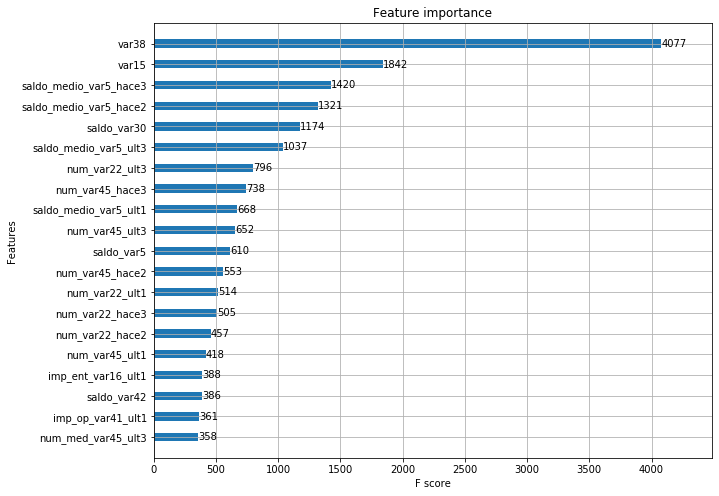

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [15]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


C:\Users\KwonChulmin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 0.878765	valid_0's binary_logloss: 0.122704	valid_1's auc: 0.838946	valid_1's binary_logloss: 0.139572
[36]	valid_0's auc: 0.879377	valid_0's binary_logloss: 0.122448	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.139554
[37]	valid_0's auc: 0.880134	valid_0's binary_logloss: 0.122143	valid_1's auc: 0.838888	valid_1's binary_logloss: 0.139557
[38]	valid_0's auc: 0.880571	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.839133	valid_1's binary_logloss: 0.13952
[39]	valid_0's auc:

[39]	valid_0's auc: 0.879978	valid_0's binary_logloss: 0.122126	valid_1's auc: 0.83945	valid_1's binary_logloss: 0.139391
[40]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.121938	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.139314
[41]	valid_0's auc: 0.880914	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.13937
[42]	valid_0's auc: 0.881674	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.839744	valid_1's binary_logloss: 0.139371
[43]	valid_0's auc: 0.882352	valid_0's binary_logloss: 0.121291	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.139358
[44]	valid_0's auc: 0.882869	valid_0's binary_logloss: 0.121117	valid_1's auc: 0.839827	valid_1's binary_logloss: 0.13937
[45]	valid_0's auc: 0.883308	valid_0's binary_logloss: 0.120912	valid_1's auc: 0.839923	valid_1's binary_logloss: 0.139325
[46]	valid_0's auc: 0.883814	valid_0's binary_logloss: 0.120682	valid_1's auc: 0.83985	valid_1's binary_logloss: 0.139336
[47]	valid_0's auc: 

[10]	valid_0's auc: 0.85454	valid_0's binary_logloss: 0.134224	valid_1's auc: 0.838661	valid_1's binary_logloss: 0.144501
[11]	valid_0's auc: 0.856414	valid_0's binary_logloss: 0.133277	valid_1's auc: 0.838921	valid_1's binary_logloss: 0.143737
[12]	valid_0's auc: 0.857283	valid_0's binary_logloss: 0.132431	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.143197
[13]	valid_0's auc: 0.858075	valid_0's binary_logloss: 0.131688	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.142633
[14]	valid_0's auc: 0.858945	valid_0's binary_logloss: 0.130983	valid_1's auc: 0.837669	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.859875	valid_0's binary_logloss: 0.130335	valid_1's auc: 0.837434	valid_1's binary_logloss: 0.141848
[16]	valid_0's auc: 0.860979	valid_0's binary_logloss: 0.129731	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.141492
[17]	valid_0's auc: 0.861681	valid_0's binary_logloss: 0.129123	valid_1's auc: 0.837851	valid_1's binary_logloss: 0.14114
[18]	valid_0's auc

[18]	valid_0's auc: 0.862799	valid_0's binary_logloss: 0.128809	valid_1's auc: 0.838732	valid_1's binary_logloss: 0.141125
[19]	valid_0's auc: 0.864128	valid_0's binary_logloss: 0.128328	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.140763
[20]	valid_0's auc: 0.864975	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.839957	valid_1's binary_logloss: 0.140513
[21]	valid_0's auc: 0.866258	valid_0's binary_logloss: 0.127436	valid_1's auc: 0.83993	valid_1's binary_logloss: 0.140328
[22]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.127069	valid_1's auc: 0.840099	valid_1's binary_logloss: 0.14013
[23]	valid_0's auc: 0.867852	valid_0's binary_logloss: 0.126713	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.140027
[24]	valid_0's auc: 0.868599	valid_0's binary_logloss: 0.126372	valid_1's auc: 0.840299	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[26]	valid_0's auc

[31]	valid_0's auc: 0.890934	valid_0's binary_logloss: 0.118306	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.141525
[32]	valid_0's auc: 0.891349	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.829723	valid_1's binary_logloss: 0.141529
[33]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.117633	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.141488
[34]	valid_0's auc: 0.892553	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.82916	valid_1's binary_logloss: 0.141607
[35]	valid_0's auc: 0.893197	valid_0's binary_logloss: 0.116998	valid_1's auc: 0.828503	valid_1's binary_logloss: 0.141781
[36]	valid_0's auc: 0.894242	valid_0's binary_logloss: 0.116658	valid_1's auc: 0.828875	valid_1's binary_logloss: 0.141779
Early stopping, best iteration is:
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logl

[14]	valid_0's auc: 0.872498	valid_0's binary_logloss: 0.127408	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.142262
[15]	valid_0's auc: 0.873589	valid_0's binary_logloss: 0.126603	valid_1's auc: 0.837256	valid_1's binary_logloss: 0.141869
[16]	valid_0's auc: 0.875441	valid_0's binary_logloss: 0.125783	valid_1's auc: 0.837912	valid_1's binary_logloss: 0.141528
[17]	valid_0's auc: 0.877154	valid_0's binary_logloss: 0.125036	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.141384
[18]	valid_0's auc: 0.878205	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.141256
[19]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.12371	valid_1's auc: 0.835242	valid_1's binary_logloss: 0.141186
[20]	valid_0's auc: 0.880623	valid_0's binary_logloss: 0.123116	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.140946
[21]	valid_0's auc: 0.881898	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.140914
[22]	valid_0's au

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

[10]	valid_0's auc: 0.85449	valid_0's binary_logloss: 0.134596	valid_1's auc: 0.837845	valid_1's binary_logloss: 0.144271
[11]	valid_0's auc: 0.855485	valid_0's binary_logloss: 0.133677	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.14351
[12]	valid_0's auc: 0.856918	valid_0's binary_logloss: 0.132832	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.142834
[13]	valid_0's auc: 0.857461	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.142308
[14]	valid_0's auc: 0.858342	valid_0's binary_logloss: 0.131428	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.141925
[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 0.860793	valid_0's binary_logloss: 0.129728	valid_1's auc: 0.837788	valid_1's binary_logloss: 0.140844
[18]	valid_0's auc

[39]	valid_0's auc: 0.877193	valid_0's binary_logloss: 0.123186	valid_1's auc: 0.84006	valid_1's binary_logloss: 0.139095
[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc:

[31]	valid_0's auc: 0.871414	valid_0's binary_logloss: 0.125161	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.140216
[32]	valid_0's auc: 0.872281	valid_0's binary_logloss: 0.12493	valid_1's auc: 0.833344	valid_1's binary_logloss: 0.140148
[33]	valid_0's auc: 0.873038	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.140091
[34]	valid_0's auc: 0.873571	valid_0's binary_logloss: 0.124499	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.140069
[35]	valid_0's auc: 0.874263	valid_0's binary_logloss: 0.124311	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.140067
[36]	valid_0's auc: 0.87467	valid_0's binary_logloss: 0.124165	valid_1's auc: 0.833345	valid_1's binary_logloss: 0.140029
[37]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.123937	valid_1's auc: 0.833447	valid_1's binary_logloss: 0.140009
[38]	valid_0's auc: 0.876178	valid_0's binary_logloss: 0.123686	valid_1's auc: 0.833499	valid_1's binary_logloss: 0.139986
[39]	valid_0's auc

[9]	valid_0's auc: 0.861391	valid_0's binary_logloss: 0.133585	valid_1's auc: 0.834625	valid_1's binary_logloss: 0.145543
[10]	valid_0's auc: 0.863676	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834954	valid_1's binary_logloss: 0.144707
[11]	valid_0's auc: 0.865339	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835252	valid_1's binary_logloss: 0.144034
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0.87234	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.141876
[17]	valid_0's auc:

[36]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117475	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.139057
[37]	valid_0's auc: 0.893672	valid_0's binary_logloss: 0.117095	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.139109
[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc

[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	valid_1's binary_logloss: 0.146527
[9]	valid_0's auc: 0.861391	valid_0's binary_logloss: 0.133585	valid_1's auc: 0.834625	valid_1's binary_logloss: 0.145543
[10]	valid_0's auc: 0.863676	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834954	valid_1's binary_logloss: 0.144707
[11]	valid_0's auc: 0.865339	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835252	valid_1's binary_logloss: 0.144034
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.

[33]	valid_0's auc: 0.890569	valid_0's binary_logloss: 0.118502	valid_1's auc: 0.838736	valid_1's binary_logloss: 0.139065
[34]	valid_0's auc: 0.891418	valid_0's binary_logloss: 0.118158	valid_1's auc: 0.838692	valid_1's binary_logloss: 0.139051
[35]	valid_0's auc: 0.892153	valid_0's binary_logloss: 0.117818	valid_1's auc: 0.838839	valid_1's binary_logloss: 0.139022
[36]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117475	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.139057
[37]	valid_0's auc: 0.893672	valid_0's binary_logloss: 0.117095	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.139109
[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc

[10]	valid_0's auc: 0.852371	valid_0's binary_logloss: 0.134185	valid_1's auc: 0.839808	valid_1's binary_logloss: 0.144182
[11]	valid_0's auc: 0.853705	valid_0's binary_logloss: 0.133238	valid_1's auc: 0.83943	valid_1's binary_logloss: 0.14345
[12]	valid_0's auc: 0.855304	valid_0's binary_logloss: 0.132409	valid_1's auc: 0.838786	valid_1's binary_logloss: 0.142878
[13]	valid_0's auc: 0.856638	valid_0's binary_logloss: 0.131658	valid_1's auc: 0.838632	valid_1's binary_logloss: 0.142368
[14]	valid_0's auc: 0.85784	valid_0's binary_logloss: 0.130967	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.14198
[15]	valid_0's auc: 0.859432	valid_0's binary_logloss: 0.130373	valid_1's auc: 0.838236	valid_1's binary_logloss: 0.141582
[16]	valid_0's auc: 0.860428	valid_0's binary_logloss: 0.129814	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.141389
[17]	valid_0's auc: 0.861409	valid_0's binary_logloss: 0.12923	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.141106
[18]	valid_0's auc: 0

[40]	valid_0's auc: 0.881495	valid_0's binary_logloss: 0.121571	valid_1's auc: 0.838869	valid_1's binary_logloss: 0.139555
[41]	valid_0's auc: 0.881897	valid_0's binary_logloss: 0.121382	valid_1's auc: 0.838702	valid_1's binary_logloss: 0.139575
[42]	valid_0's auc: 0.882625	valid_0's binary_logloss: 0.121107	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139554
[43]	valid_0's auc: 0.882956	valid_0's binary_logloss: 0.120926	valid_1's auc: 0.83914	valid_1's binary_logloss: 0.139546
[44]	valid_0's auc: 0.883618	valid_0's binary_logloss: 0.120726	valid_1's auc: 0.838905	valid_1's binary_logloss: 0.139592
[45]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.120513	valid_1's auc: 0.838587	valid_1's binary_logloss: 0.139651
[46]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.120339	valid_1's auc: 0.838288	valid_1's binary_logloss: 0.139703
[47]	valid_0's auc: 0.884789	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139692
[48]	valid_0's auc:

[52]	valid_0's auc: 0.886053	valid_0's binary_logloss: 0.119673	valid_1's auc: 0.839593	valid_1's binary_logloss: 0.139409
[53]	valid_0's auc: 0.886187	valid_0's binary_logloss: 0.119567	valid_1's auc: 0.839723	valid_1's binary_logloss: 0.139436
[54]	valid_0's auc: 0.886397	valid_0's binary_logloss: 0.11943	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139424
[55]	valid_0's auc: 0.886702	valid_0's binary_logloss: 0.119279	valid_1's auc: 0.839951	valid_1's binary_logloss: 0.139433
Early stopping, best iteration is:
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_lo

[26]	valid_0's auc: 0.871649	valid_0's binary_logloss: 0.125171	valid_1's auc: 0.838779	valid_1's binary_logloss: 0.139741
[27]	valid_0's auc: 0.872513	valid_0's binary_logloss: 0.124859	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.139648
[28]	valid_0's auc: 0.873252	valid_0's binary_logloss: 0.124586	valid_1's auc: 0.839378	valid_1's binary_logloss: 0.139578
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[30]	valid_0's auc: 0.874647	valid_0's binary_logloss: 0.124019	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.13958
[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 

[10]	valid_0's auc: 0.867401	valid_0's binary_logloss: 0.131116	valid_1's auc: 0.836429	valid_1's binary_logloss: 0.144153
[11]	valid_0's auc: 0.868477	valid_0's binary_logloss: 0.129981	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.143351
[12]	valid_0's auc: 0.87007	valid_0's binary_logloss: 0.128907	valid_1's auc: 0.836122	valid_1's binary_logloss: 0.142803
[13]	valid_0's auc: 0.8711	valid_0's binary_logloss: 0.127994	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.142243
[14]	valid_0's auc: 0.872903	valid_0's binary_logloss: 0.127122	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141718
[15]	valid_0's auc: 0.874543	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.837921	valid_1's binary_logloss: 0.141291
[16]	valid_0's auc: 0.876148	valid_0's binary_logloss: 0.1255	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.14114
[17]	valid_0's auc: 0.878214	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140905
[18]	valid_0's auc: 0.8

[31]	valid_0's auc: 0.891989	valid_0's binary_logloss: 0.117866	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.140006
[32]	valid_0's auc: 0.892909	valid_0's binary_logloss: 0.117477	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.140054
[33]	valid_0's auc: 0.893597	valid_0's binary_logloss: 0.117091	valid_1's auc: 0.836874	valid_1's binary_logloss: 0.140061
[34]	valid_0's auc: 0.894331	valid_0's binary_logloss: 0.116711	valid_1's auc: 0.836404	valid_1's binary_logloss: 0.140111
[35]	valid_0's auc: 0.895331	valid_0's binary_logloss: 0.116306	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139942
[36]	valid_0's auc: 0.895954	valid_0's binary_logloss: 0.115973	valid_1's auc: 0.837138	valid_1's binary_logloss: 0.139958
[37]	valid_0's auc: 0.896701	valid_0's binary_logloss: 0.115673	valid_1's auc: 0.837045	valid_1's binary_logloss: 0.139954
[38]	valid_0's auc: 0.897344	valid_0's binary_logloss: 0.115335	valid_1's auc: 0.836585	valid_1's binary_logloss: 0.140026
[39]	valid_0's au

[22]	valid_0's auc: 0.883688	valid_0's binary_logloss: 0.121776	valid_1's auc: 0.836698	valid_1's binary_logloss: 0.140127
[23]	valid_0's auc: 0.88451	valid_0's binary_logloss: 0.121226	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.140044
[24]	valid_0's auc: 0.88609	valid_0's binary_logloss: 0.120643	valid_1's auc: 0.836883	valid_1's binary_logloss: 0.139917
[25]	valid_0's auc: 0.887311	valid_0's binary_logloss: 0.120104	valid_1's auc: 0.837018	valid_1's binary_logloss: 0.139879
[26]	valid_0's auc: 0.888754	valid_0's binary_logloss: 0.11961	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.139895
[27]	valid_0's auc: 0.889697	valid_0's binary_logloss: 0.119114	valid_1's auc: 0.836828	valid_1's binary_logloss: 0.139904
[28]	valid_0's auc: 0.891102	valid_0's binary_logloss: 0.118637	valid_1's auc: 0.83685	valid_1's binary_logloss: 0.139833
[29]	valid_0's auc: 0.891823	valid_0's binary_logloss: 0.118217	valid_1's auc: 0.836568	valid_1's binary_logloss: 0.139836
[30]	valid_0's auc: 0.

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

[31]	valid_0's auc: 0.871162	valid_0's binary_logloss: 0.124861	valid_1's auc: 0.838979	valid_1's binary_logloss: 0.139225
[32]	valid_0's auc: 0.871762	valid_0's binary_logloss: 0.124652	valid_1's auc: 0.838753	valid_1's binary_logloss: 0.139233
[33]	valid_0's auc: 0.872722	valid_0's binary_logloss: 0.124394	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.1391
[34]	valid_0's auc: 0.87368	valid_0's binary_logloss: 0.124127	valid_1's auc: 0.839489	valid_1's binary_logloss: 0.139029
[35]	valid_0's auc: 0.874492	valid_0's binary_logloss: 0.12392	valid_1's auc: 0.839553	valid_1's binary_logloss: 0.139024
[36]	valid_0's auc: 0.875059	valid_0's binary_logloss: 0.123723	valid_1's auc: 0.839658	valid_1's binary_logloss: 0.138948
[37]	valid_0's auc: 0.875726	valid_0's binary_logloss: 0.123495	valid_1's auc: 0.839391	valid_1's binary_logloss: 0.139005
Early stopping, best iteration is:
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logl

[62]	valid_0's auc: 0.885341	valid_0's binary_logloss: 0.119477	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139385
[63]	valid_0's auc: 0.885487	valid_0's binary_logloss: 0.119367	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139409
[64]	valid_0's auc: 0.885645	valid_0's binary_logloss: 0.119254	valid_1's auc: 0.839603	valid_1's binary_logloss: 0.139483
[65]	valid_0's auc: 0.886	valid_0's binary_logloss: 0.119067	valid_1's auc: 0.839806	valid_1's binary_logloss: 0.139511
[66]	valid_0's auc: 0.886267	valid_0's binary_logloss: 0.118949	valid_1's auc: 0.839758	valid_1's binary_logloss: 0.139539
[67]	valid_0's auc: 0.886435	valid_0's binary_logloss: 0.118836	valid_1's auc: 0.83953	valid_1's binary_logloss: 0.139595
[68]	valid_0's auc: 0.886593	valid_0's binary_logloss: 0.118728	valid_1's auc: 0.839422	valid_1's binary_logloss: 0.139608
[69]	valid_0's auc: 0.886791	valid_0's binary_logloss: 0.118595	valid_1's auc: 0.839492	valid_1's binary_logloss: 0.139615
[70]	valid_0's auc: 

[39]	valid_0's auc: 0.877193	valid_0's binary_logloss: 0.123186	valid_1's auc: 0.84006	valid_1's binary_logloss: 0.139095
[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc:

[32]	valid_0's auc: 0.887603	valid_0's binary_logloss: 0.119623	valid_1's auc: 0.831023	valid_1's binary_logloss: 0.140912
[33]	valid_0's auc: 0.888164	valid_0's binary_logloss: 0.11928	valid_1's auc: 0.830667	valid_1's binary_logloss: 0.140953
[34]	valid_0's auc: 0.888957	valid_0's binary_logloss: 0.118937	valid_1's auc: 0.830222	valid_1's binary_logloss: 0.141016
[35]	valid_0's auc: 0.889746	valid_0's binary_logloss: 0.118573	valid_1's auc: 0.830175	valid_1's binary_logloss: 0.141039
[36]	valid_0's auc: 0.890215	valid_0's binary_logloss: 0.118288	valid_1's auc: 0.830319	valid_1's binary_logloss: 0.140986
[37]	valid_0's auc: 0.890966	valid_0's binary_logloss: 0.117947	valid_1's auc: 0.830443	valid_1's binary_logloss: 0.140993
[38]	valid_0's auc: 0.891474	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.141016
[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's au

[9]	valid_0's auc: 0.860878	valid_0's binary_logloss: 0.1336	valid_1's auc: 0.835613	valid_1's binary_logloss: 0.145179
[10]	valid_0's auc: 0.862432	valid_0's binary_logloss: 0.132438	valid_1's auc: 0.836519	valid_1's binary_logloss: 0.144304
[11]	valid_0's auc: 0.864715	valid_0's binary_logloss: 0.131298	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143576
[12]	valid_0's auc: 0.86649	valid_0's binary_logloss: 0.13029	valid_1's auc: 0.837121	valid_1's binary_logloss: 0.142892
[13]	valid_0's auc: 0.869207	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.837902	valid_1's binary_logloss: 0.142287
[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.871881	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.83767	valid_1's binary_logloss: 0.141625
[16]	valid_0's auc: 0.873451	valid_0's binary_logloss: 0.126932	valid_1's auc: 0.837454	valid_1's binary_logloss: 0.141273
[17]	valid_0's auc: 0.

[35]	valid_0's auc: 0.889746	valid_0's binary_logloss: 0.118573	valid_1's auc: 0.830175	valid_1's binary_logloss: 0.141039
[36]	valid_0's auc: 0.890215	valid_0's binary_logloss: 0.118288	valid_1's auc: 0.830319	valid_1's binary_logloss: 0.140986
[37]	valid_0's auc: 0.890966	valid_0's binary_logloss: 0.117947	valid_1's auc: 0.830443	valid_1's binary_logloss: 0.140993
[38]	valid_0's auc: 0.891474	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.141016
[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's auc: 0.892568	valid_0's binary_logloss: 0.117061	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.140918
[41]	valid_0's auc: 0.893181	valid_0's binary_logloss: 0.11681	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.140963
[42]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116476	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.140945
Early stopping, b

[9]	valid_0's auc: 0.860878	valid_0's binary_logloss: 0.1336	valid_1's auc: 0.835613	valid_1's binary_logloss: 0.145179
[10]	valid_0's auc: 0.862432	valid_0's binary_logloss: 0.132438	valid_1's auc: 0.836519	valid_1's binary_logloss: 0.144304
[11]	valid_0's auc: 0.864715	valid_0's binary_logloss: 0.131298	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143576
[12]	valid_0's auc: 0.86649	valid_0's binary_logloss: 0.13029	valid_1's auc: 0.837121	valid_1's binary_logloss: 0.142892
[13]	valid_0's auc: 0.869207	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.837902	valid_1's binary_logloss: 0.142287
[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.871881	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.83767	valid_1's binary_logloss: 0.141625
[16]	valid_0's auc: 0.873451	valid_0's binary_logloss: 0.126932	valid_1's auc: 0.837454	valid_1's binary_logloss: 0.141273
[17]	valid_0's auc: 0.

[33]	valid_0's auc: 0.882558	valid_0's binary_logloss: 0.122542	valid_1's auc: 0.842676	valid_1's binary_logloss: 0.138654
[34]	valid_0's auc: 0.883424	valid_0's binary_logloss: 0.12228	valid_1's auc: 0.842829	valid_1's binary_logloss: 0.138612
[35]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.842651	valid_1's binary_logloss: 0.138595
[36]	valid_0's auc: 0.885075	valid_0's binary_logloss: 0.121697	valid_1's auc: 0.842554	valid_1's binary_logloss: 0.138593
[37]	valid_0's auc: 0.885953	valid_0's binary_logloss: 0.121404	valid_1's auc: 0.842654	valid_1's binary_logloss: 0.138558
[38]	valid_0's auc: 0.887245	valid_0's binary_logloss: 0.121133	valid_1's auc: 0.842656	valid_1's binary_logloss: 0.138548
[39]	valid_0's auc: 0.887995	valid_0's binary_logloss: 0.120851	valid_1's auc: 0.842756	valid_1's binary_logloss: 0.138472
[40]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120601	valid_1's auc: 0.842976	valid_1's binary_logloss: 0.138411
[41]	valid_0's auc

In [19]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss